# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [6]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [16]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [17]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [19]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2197/2197 [==============================] - 1902s 865ms/step - loss: 1.3185 - accuracy: 0.6118 - val_loss: 0.6056 - val_accuracy: 0.8062
Epoch 2/10
2197/2197 [==============================] - 1876s 854ms/step - loss: 0.4201 - accuracy: 0.8665 - val_loss: 0.3447 - val_accuracy: 0.8891
Epoch 3/10
2197/2197 [==============================] - 1873s 852ms/step - loss: 0.2518 - accuracy: 0.9199 - val_loss: 0.2041 - val_accuracy: 0.9318
Epoch 4/10
2197/2197 [==============================] - 1825s 830ms/step - loss: 0.1764 - accuracy: 0.9438 - val_loss: 0.1747 - val_accuracy: 0.9453
Epoch 5/10
2197/2197 [==============================] - 1821s 829ms/step - loss: 0.1318 - accuracy: 0.9568 - val_loss: 0.1429 - val_accuracy: 0.9554
Epoch 6/10
2197/2197 [==============================] - 1827s 831ms/step - loss: 0.1020 - accuracy: 0.9662 - val_loss: 0.1655 - val_accuracy: 0.9489
Epoch 7/10
2197/2197 [==============================] - 1812s 825ms/step - loss: 0.0854 - accuracy: 0.97

## Evaluating Model

In [20]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 435s 198ms/step - loss: 0.0575 - accuracy: 0.9822
Training accuracy: 0.9821893572807312


In [21]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 90s 164ms/step - loss: 0.1520 - accuracy: 0.9553
Validation accuracy: 0.9553266763687134


### Saving Model

In [22]:
cnn.save('trained_plant_disease_model.keras')

In [23]:
cnn.save('trained_plant_disease_model_IT3A.keras')

In [26]:
# Save the model
model_filename = 'trained_plant_disease_model.h5'
cnn.save(model_filename)

In [27]:
# Save the model
model_filename = 'trained_plant_disease_model_IT3A.keras'
cnn.save(model_filename)

In [28]:
training_history.history #Return Dictionary of history

{'loss': [1.318506121635437,
  0.4201323688030243,
  0.25183627009391785,
  0.1763831377029419,
  0.13177770376205444,
  0.10201339423656464,
  0.08540771901607513,
  0.07098159939050674,
  0.06269758939743042,
  0.055445894598960876],
 'accuracy': [0.6117931604385376,
  0.8665196895599365,
  0.9199231863021851,
  0.9437797665596008,
  0.956753671169281,
  0.9661995768547058,
  0.9723451137542725,
  0.9770253896713257,
  0.9796998500823975,
  0.9822320342063904],
 'val_loss': [0.6055588126182556,
  0.3446531891822815,
  0.20408640801906586,
  0.17468050122261047,
  0.1428774744272232,
  0.16553997993469238,
  0.1268492043018341,
  0.21413865685462952,
  0.11176258325576782,
  0.15196362137794495],
 'val_accuracy': [0.8061689138412476,
  0.8891417980194092,
  0.9317664504051208,
  0.9452537894248962,
  0.9553835391998291,
  0.9488959908485413,
  0.959936261177063,
  0.9344980716705322,
  0.9664807915687561,
  0.9553266763687134]}

In [29]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [30]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

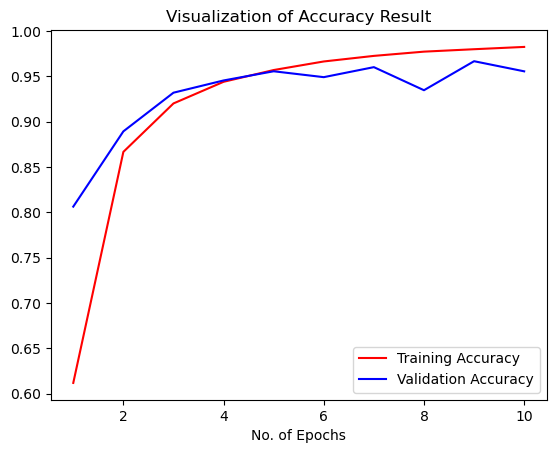

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [39]:
class_name = validation_set.class_names

In [40]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [41]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 361s 21ms/step


In [42]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [43]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [44]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [45]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [46]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.96      0.95       504
                                 Apple___Black_rot       0.91      0.99      0.95       497
                          Apple___Cedar_apple_rust       0.99      0.96      0.98       440
                                   Apple___healthy       0.95      0.92      0.93       502
                               Blueberry___healthy       0.83      0.99      0.90       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.93      0.96       421
                 Cherry_(including_sour)___healthy       0.98      0.96      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.96      0.94       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.94      0.

### Confusion Matrix Visualization

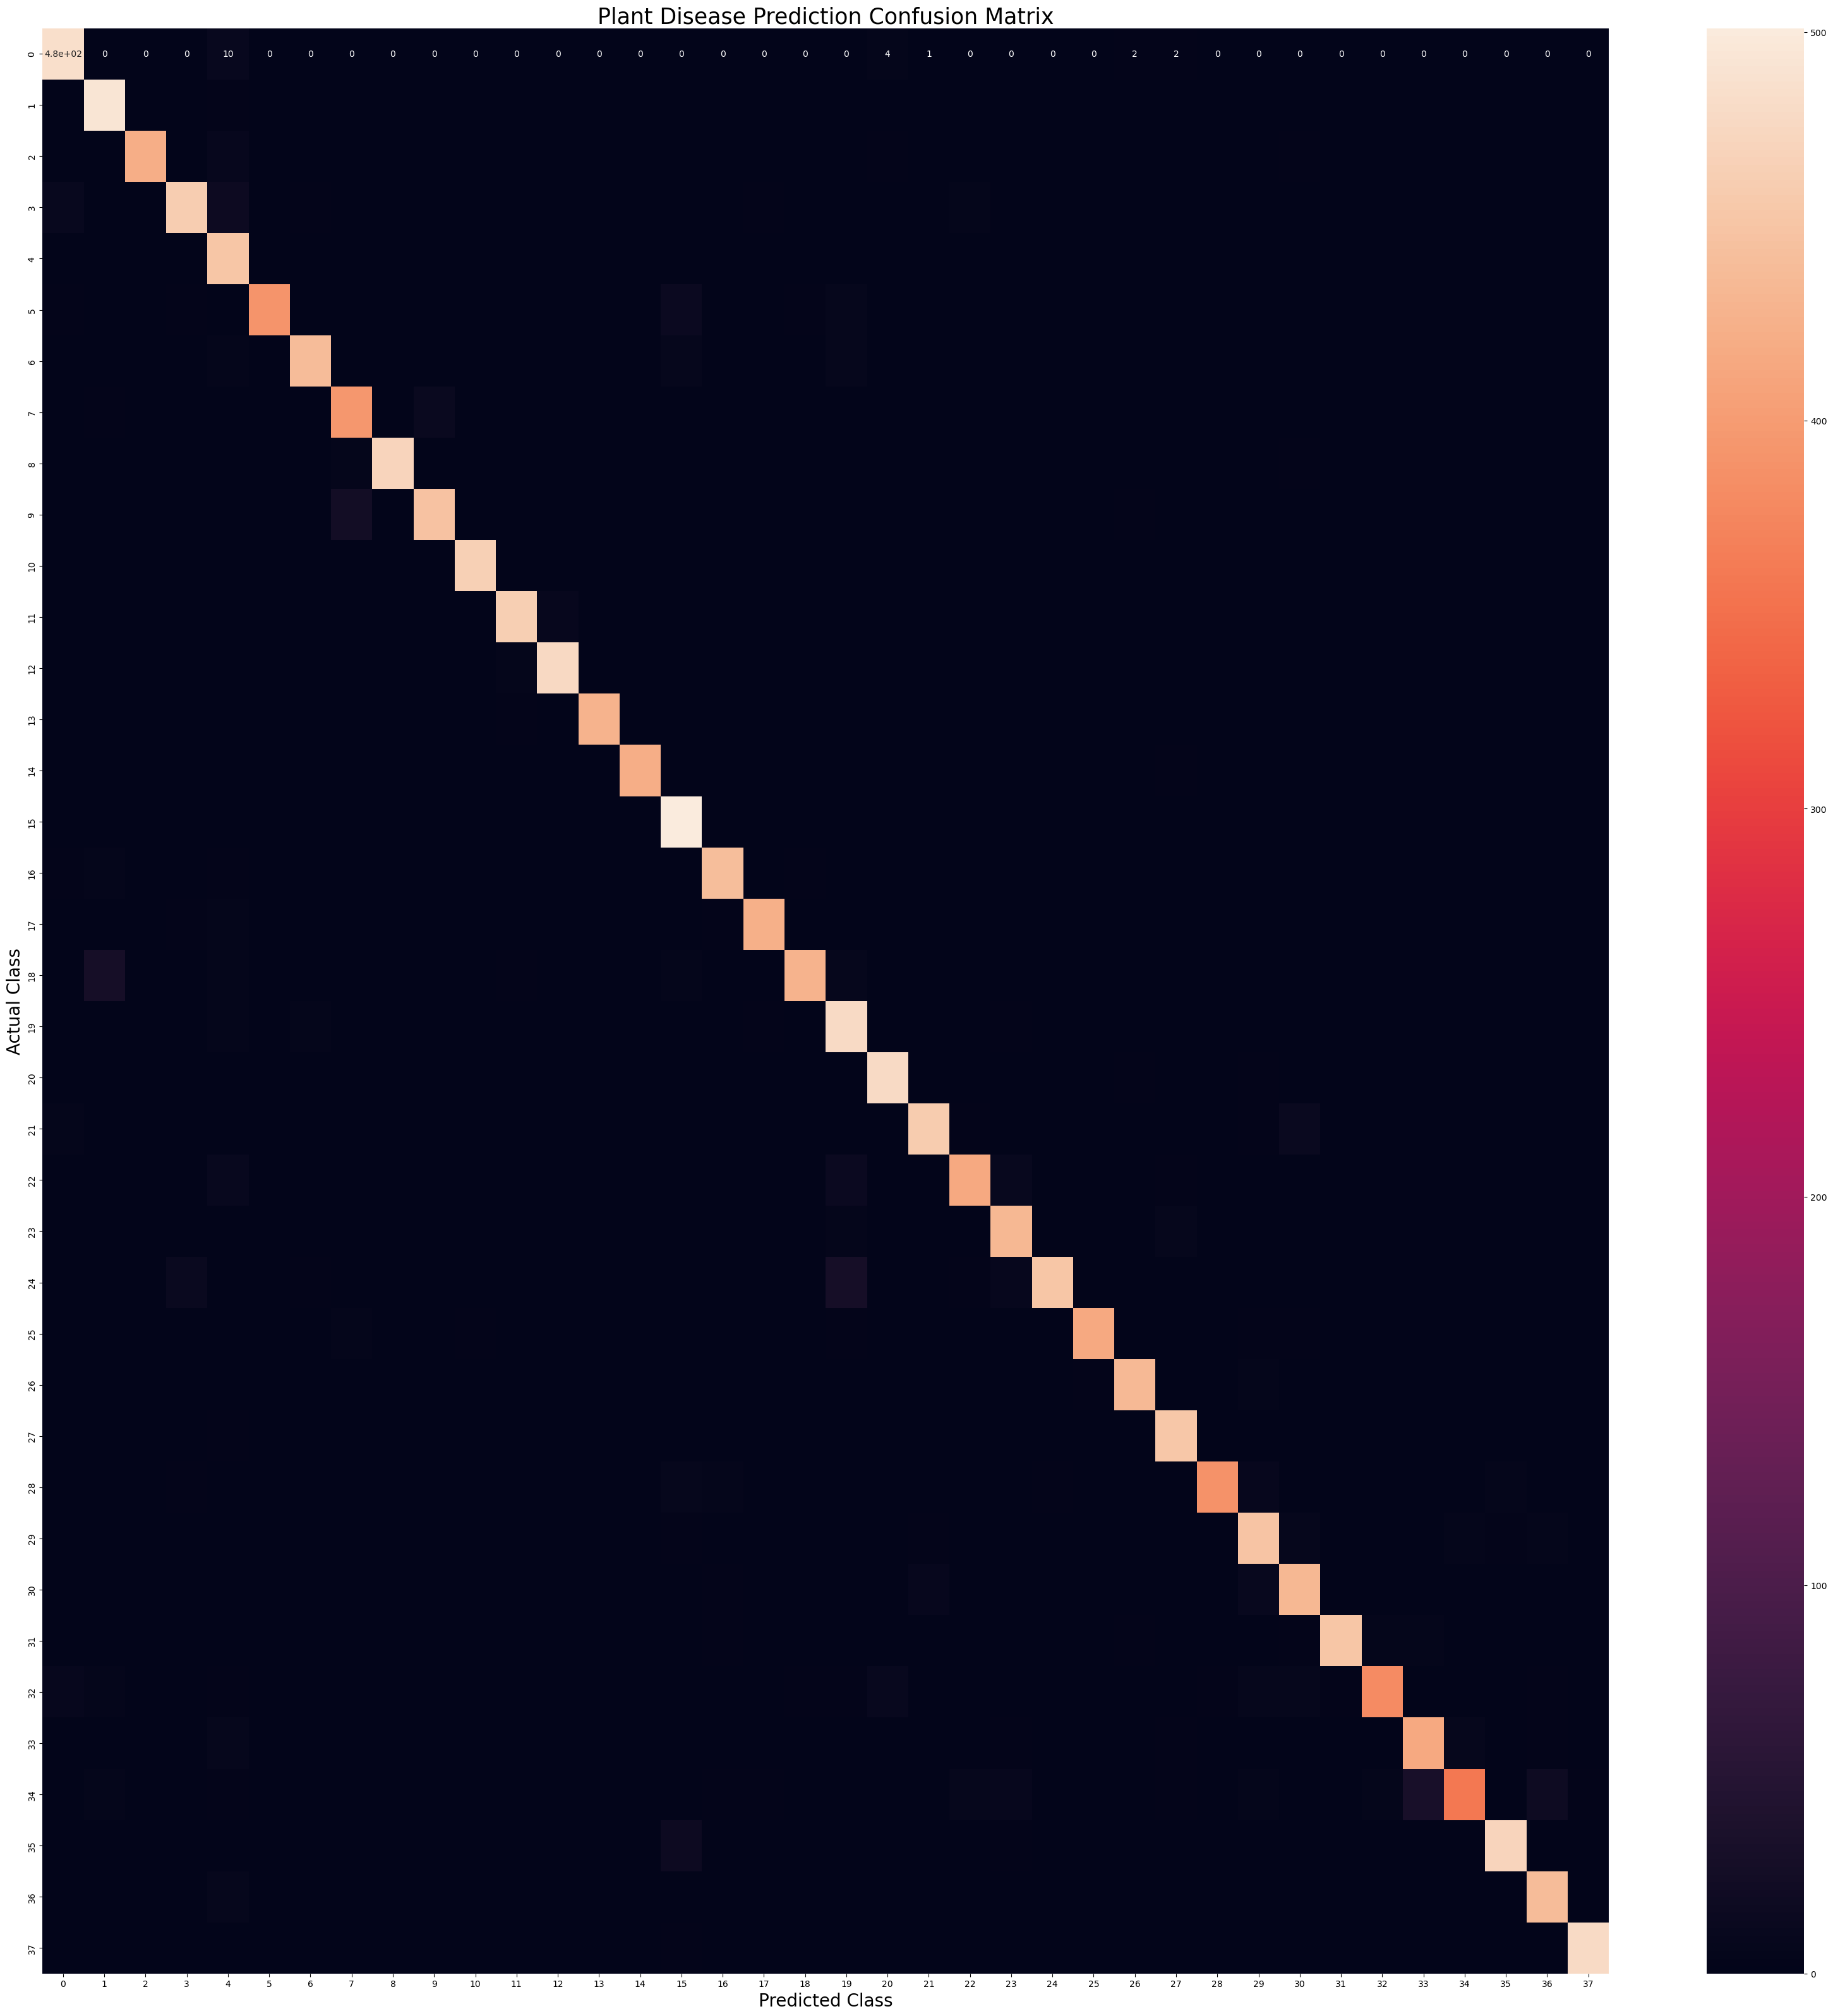

In [47]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()